## Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

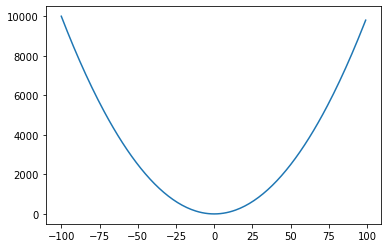

In [32]:
x = np.arange(-100,100,1)
f_x = x**2

plt.plot(x, f_x)
plt.show()

In [37]:
x_new = 100
derivative = []
y = []
learning_rate = 0.1
for i in range(1000):
    old_value = x_new
    derivative.append(old_value - learning_rate * 2 * old_value)
    x_new = old_value - learning_rate * 2 * old_value
    y.append(x_new ** 2)

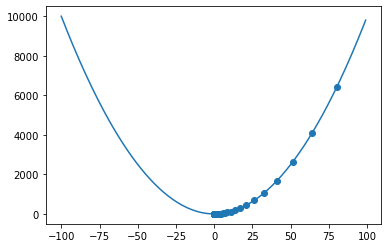

In [38]:
plt.plot(x,f_x)
plt.scatter(derivative,y)
plt.show()

## Linear Regression with GD & lmplementation

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### Gen_data

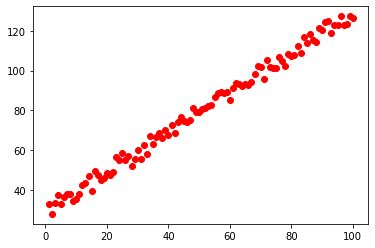

In [46]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    
    for i in range(0, numPoints):
        x[i][0] = 1
        x[i][1] = i
        
        y[i] = (i + bias) + np.random.uniform(0,1) * variance
    return x,y

x,y = gen_data(100,25,10)

plt.plot(x[:,1]+1,y,"ro")
plt.show()

### Data Load

In [49]:
df = pd.read_csv("C:/Data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [50]:
raw_X = df["X"].values.reshape(-1,1)
y = df["Y"].values

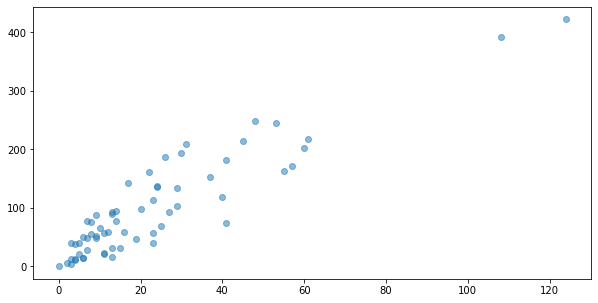

In [51]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, "o", alpha=0.5)

In [52]:
raw_X[:5],y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [58]:
np.ones((len(raw_X),1))[:3]

array([[1.],
       [1.],
       [1.]])

In [60]:
X = np.concatenate((np.ones((len(raw_X),1)), raw_X), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [64]:
w = np.random.normal((2,1))
w

array([1.82098914, 0.4105328 ])

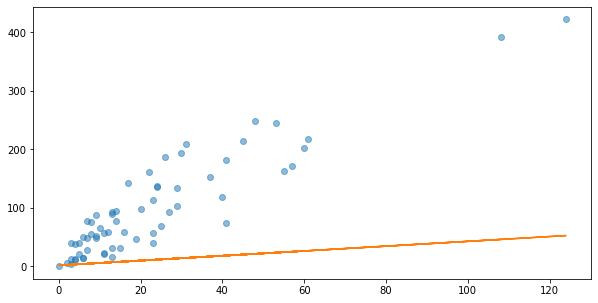

In [65]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X,w)
plt.plot(raw_X,y,"o",alpha=0.5)
plt.plot(raw_X,y_predict)

### Hypothesis and cost function

In [66]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [69]:
h = hypothesis_function(X,w)

In [70]:
def cost_function(h,y):
    return(1/(2*len(y))) * np.sum((h-y)**2)

In [71]:
h = hypothesis_function(X,w)
cost_function(h,y)

6826.9263680768

### Gradient descent

In [72]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

### Do linear regression with GD

In [73]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.87912291  3.41631452]
cost: 625.3743295505636


In [86]:
theta_list[:10]

[[1.820989140502076, 0.41053280180153207],
 [1.9079522968695166, 4.014141992420631],
 [1.9946549015598165, 3.802482594320438],
 [2.085425140592998, 3.800522649600742],
 [2.17573763997522, 3.7985725885657953],
 [2.2655947080135883, 3.7966323613736033],
 [2.354998641374791, 3.7947019184336868],
 [2.4439517251437985, 3.792781210405641],
 [2.532456232882267, 3.7908701881978786],
 [2.6205144266866496, 3.7889688029663735]]

In [87]:
theta_list = np.array(theta_list)

In [88]:
cost_list[:5]

[6826.9263680768,
 731.4740002007675,
 707.2875634499073,
 706.4634622601586,
 705.6476517316584]

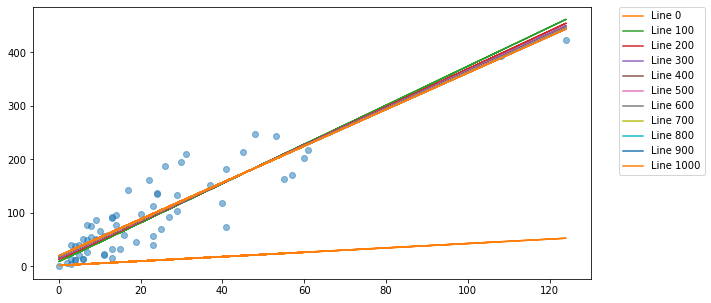

In [89]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

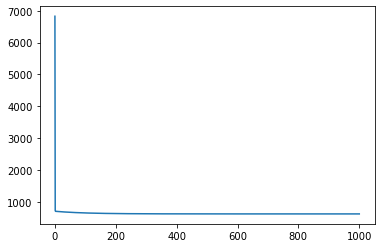

In [93]:
plt.plot(range(len(cost_list)), cost_list);